# <span style="color:#E67E22">DL-***EEG***-TES: Deep Learning Classification of EEG Responses to Transcranial Electrical Stimulation

---

### Prepare Environment:

In [1]:
#If we are in Google Colab, download necessary files first:
if 'google.colab' in str(get_ipython()):
    import os
    !pip install -q tensorflow mne kaggle ipympl catch22
    # !pip install -q -U --force-reinstall --no-deps kaggle
    
    if not os.getcwd().endswith('cloned-repo'):
        #Clone the GitHub repo:
        !git clone git://github.com/alexispomares/DL-EEG-TES.git cloned-repo
        %cd cloned-repo

        #Authenticate and download from Kaggle:
        os.environ['KAGGLE_USERNAME'] = "yourUsername"
        os.environ['KAGGLE_KEY'] = "yourKey"
        !kaggle datasets download -d alexispomares/dissertation-raw --unzip -p data/raw-EEG

else:
    %load_ext autoreload
    %autoreload 2

#     %matplotlib inline
    %matplotlib widget

In [2]:
import EEG_pipeline as pipeline

### Define Constants:

In [3]:
constants = pipeline.Constants()

Text(value='data/raw-EEG', description='📁 Path to EEG recordings: ', layout=Layout(width='50%'), placeholder='…

Text(value='support-data/EEG-TES/experimental-data', description='📁 Path to input CSV data: ', layout=Layout(w…

Text(value='data/preprocessed-EEG', description='📁 Path to output CSV data:', layout=Layout(width='50%'), plac…

In [4]:
constants.EEG_parameters()

In [5]:
constants.data_parameters()

ToggleButtons(button_style='info', description='Loop Mode:', options=('ONE', 'MANY', 'ALL'), tooltips=('Run th…

> <span style="color:gray"> *Multiple values can be selected with <kbd>shift</kbd> and/or <kbd>ctrl</kbd> (or <kbd>command</kbd>) pressed together with mouse clicks or arrow keys.*

In [6]:
constants.control_parameters()

ToggleButtons(button_style='danger', description='Data Export Mode:', index=3, options=('NONE', 'TIMESERIES_ON…

### Begin Session:

In [7]:
session = pipeline.Session(constants.parameters, skip_calibration=False, start_from_run=0)

In [8]:
session.begin_loop()

> <span style="color:gray">*NOTE: this loop works only in Jupyter Notebooks; if in Jupyter Lab, click 'Help > Launch Classic Notebook'*

📢 Iterating through the following 1 EEG files:

👉 0: ['P000', 'run5', '20210726', '061230.mff']

⚠️ Manual execution is preferred when Visualization Mode is enabled. Please disable if you're looking for automated execution!


---

In [9]:
orig_raw, events, metadata = pipeline.load_EEG()

Reading EGI MFF Header from D:\Users\alexi\Tutti Frutti\Imperial\MRes Project\DL-EEG-TES (from Imperial HPC)\data\raw-EEG\P000\run5_20210726_061230.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...
Reading 0 ... 283913  =      0.000 ...   283.913 secs...

📢 The EEG file looks like this:

<RawMff | signal1.bin, 259 x 283914 (283.9 s), ~561.4 MB, data loaded>

<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 257 EEG, 2 STIM
 custom_ref_applied: False
 dig: 261 items (3 Cardinal, 258 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2021-07-26 12:48:26 UTC
 nchan: 259
 projs: []
 sfreq: 1000.0 Hz
>

EGI stimulation channel: GTENBLOCKEV

26 events found
Event IDs: [1]
👁‍🗨👎 Events as provided by EGI in the wrong format:
[[ 7956     0     1]
 [10953     0     1]
 [26953     0     1]
 [45953     0     1]
 [64953     0     1]]
 ...

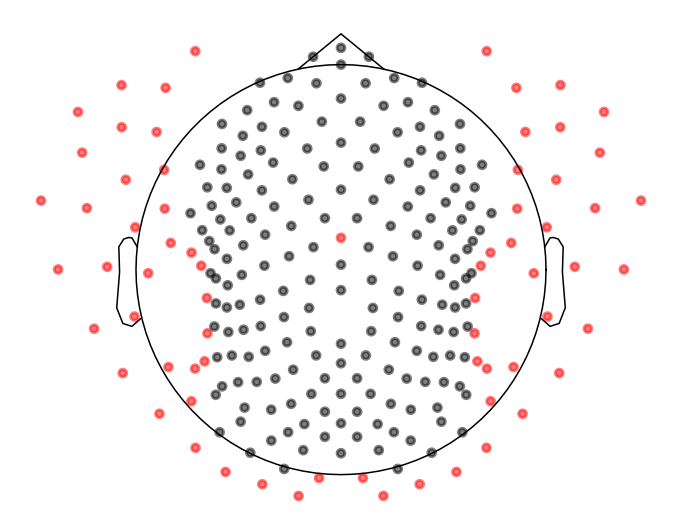

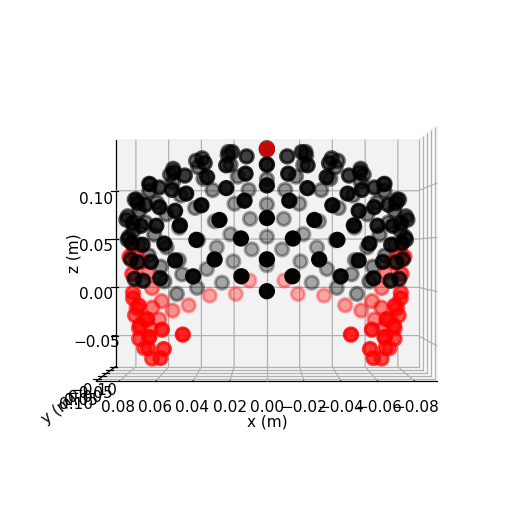

📢 Dropped 71 bad/stim channels:
['E102', 'E103', 'E111', 'E120', 'E133', 'E145', 'E146', 'E156', 'E165', 'E174', 'E187', 'E190', 'E191', 'E192', 'E199', 'E200', 'E201', 'E202', 'E208', 'E209', 'E210', 'E216', 'E217', 'E218', 'E219', 'E225', 'E226', 'E227', 'E228', 'E229', 'E230', 'E231', 'E232', 'E233', 'E234', 'E235', 'E236', 'E237', 'E238', 'E239', 'E240', 'E241', 'E242', 'E243', 'E244', 'E245', 'E246', 'E247', 'E248', 'E249', 'E250', 'E251', 'E252', 'E253', 'E254', 'E255', 'E256', 'E257', 'E67', 'E68', 'E69', 'E73', 'E74', 'E82', 'E83', 'E91', 'E92', 'E93', 'E94', 'GTENBLOCKEV', 'STI 014']


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff fre

In [10]:
raw = pipeline.preprocess_EEG(orig_raw.copy(), highpass=1, lowpass=80)

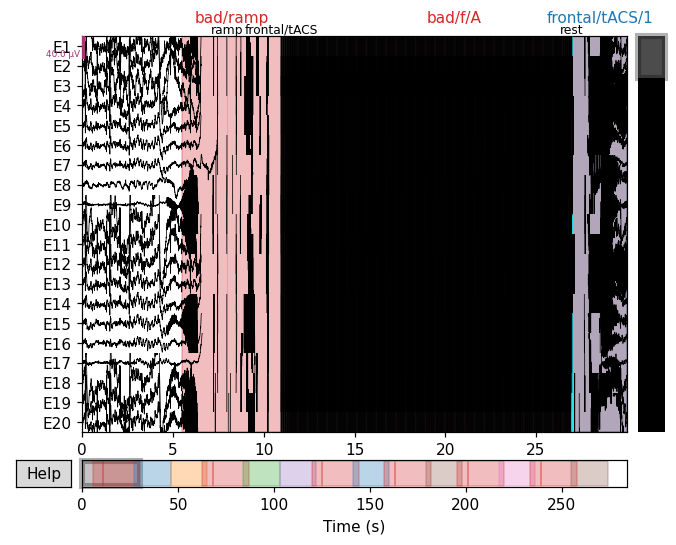

Setting 147000 of 283914 (51.78%) samples to NaN, retaining 136914 (48.22%) samples.
Effective window size : 2.048 (s)


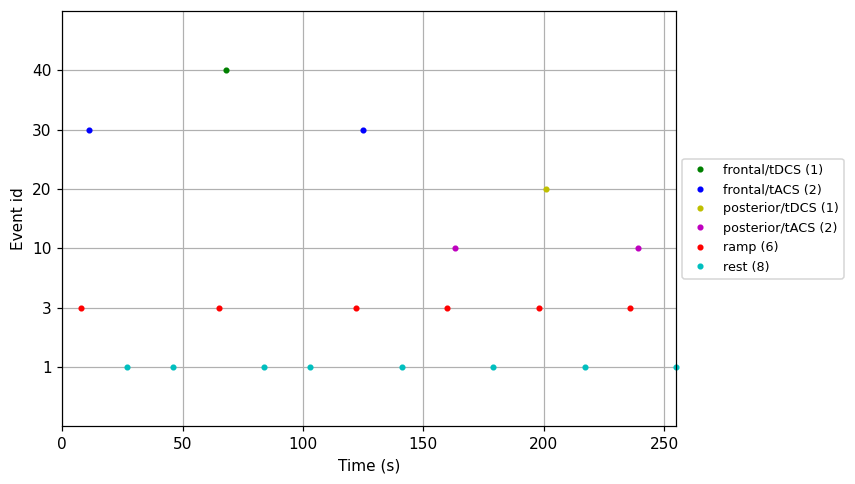

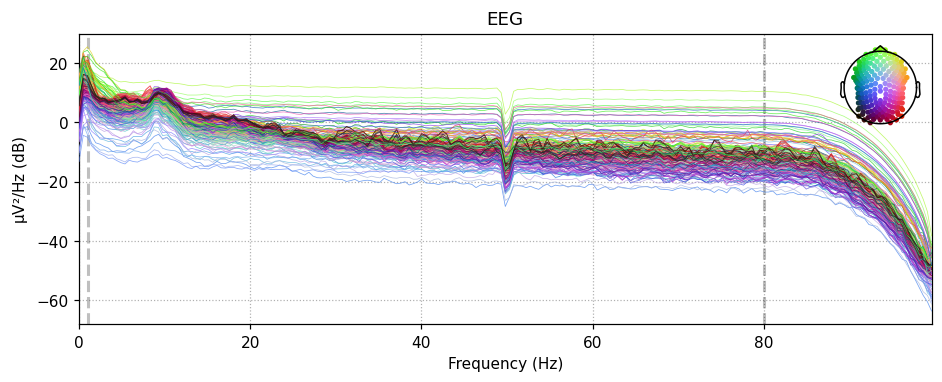

In [11]:
# import matplotlib.pyplot as plt; plt.close('all')  #run this line to free up memory if many (>20) opened interactive plots cause freezing

pipeline.visualize_Raw_EEG(raw, events, metadata)

In [12]:
epochs, whole_blocks, metadata = pipeline.epoch_EEG(raw, events, metadata)

Not setting metadata
Not setting metadata
283 matching events found
No baseline correction applied
Loading data for 283 events and 1000 original time points ...
150 bad epochs dropped
Not setting metadata
Not setting metadata
8 matching events found
No baseline correction applied
Loading data for 8 events and 12701 original time points ...
0 bad epochs dropped


Plotting a total of 119 valid Epochs:



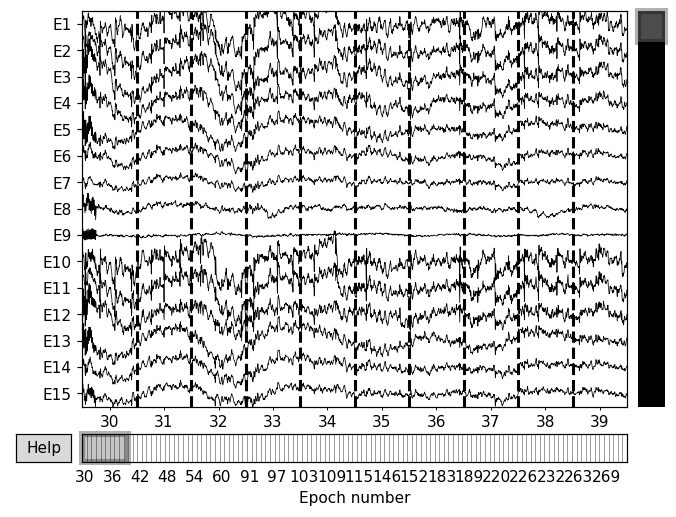



Plotting a total of 8 non-epoched resting-period Blocks:



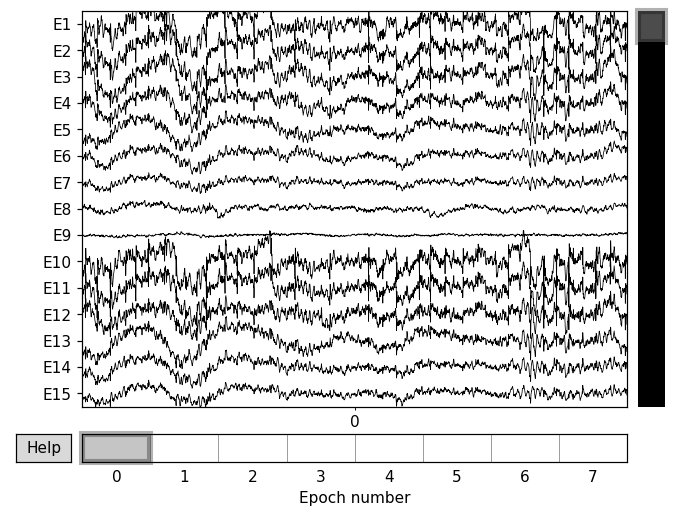

PSD Plot, averaged for all TES conditions:

    Using multitaper spectrum estimation with 7 DPSS windows


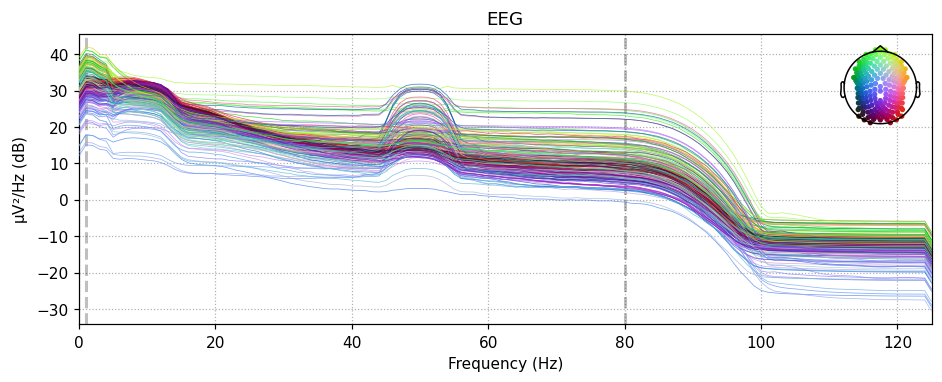

PSD Topomap, averaged for all TES conditions:

    Using multitaper spectrum estimation with 7 DPSS windows


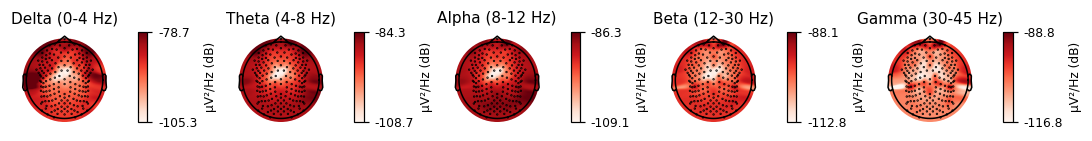

PSD Topomap, only for 'rest' conditions, and normalized in value:

    Using multitaper spectrum estimation with 7 DPSS windows


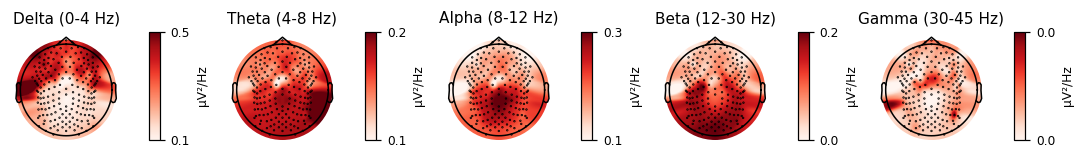

In [13]:
pipeline.visualize_Epoched_EEG(epochs, whole_blocks, metadata)

In [14]:
features = pipeline.compute_EEG_features(epochs)

Calculating features on 'Epochs' object with shape:  (n_epochs, n_channels, window_size) => (119, 188, 250)

Not setting metadata
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Effective window size : 1.000 (s)

Computed PSD from 1.0Hz to 45.0Hz, returning a shape of:  (n_epochs, n_channels, freqs) => (119, 188, 45)

Computed 37 features, each with a shape of:  (n_epochs, n_channels) => (119, 188)



In [15]:
df_features = pipeline.export_CSVs(epochs, features, metadata)


DataFrame containing the epoched EEG timeseries:


,epoch,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,E211,E212,E213,E214,E215,E220,E221,E222,E223,E224
label,,,,,,,,,,,,,,,,,,,,,
frontal/tACS/1,30,11.011695,16.944817,32.927190,29.220478,19.788079,7.790488,3.051279,18.467343,-4.028850,...,19.063257,13.902660,-14.862475,-13.602284,-23.325336,14.801513,17.412746,32.500367,10.724485,-57.097970
frontal/tACS/1,30,13.568988,20.472151,32.918907,28.827134,17.448152,10.758418,5.194877,13.260823,4.178217,...,22.386032,14.256128,12.323307,5.203931,-0.055991,20.758822,18.896809,30.530022,18.445610,-26.757661
frontal/tACS/1,30,11.890552,16.432147,9.339147,12.526282,-4.571089,8.241861,3.756671,17.276819,9.325888,...,20.218941,3.875478,8.825127,-0.264147,-4.021208,19.768236,9.981432,7.370327,24.327090,41.246599
frontal/tACS/1,30,12.353411,16.861729,-1.324499,5.190909,-14.965887,4.974346,3.255814,22.549273,3.084637,...,19.967942,0.831471,-15.671347,-19.397203,-26.485994,17.000746,7.672567,-0.101430,25.244229,55.491117
frontal/tACS/1,30,10.250559,19.203877,18.399415,18.268868,2.858796,8.021696,4.725555,21.026504,-5.472612,...,21.356028,8.466844,-21.454444,-19.732862,-30.105269,10.858362,13.551505,18.236071,20.124466,1.384636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
posterior/tACS/1,273,11.167324,11.206280,2.803809,1.841745,5.662246,6.347866,2.676160,2.537007,-0.900504,...,6.558860,11.223357,10.972423,9.260851,7.197398,10.408116,10.626514,10.214580,10.541920,6.677423
posterior/tACS/1,273,8.580507,8.215404,4.041392,0.242762,3.197189,3.991744,0.377258,1.345296,-1.522629,...,4.808199,9.077842,5.793453,3.097526,4.663678,9.446335,8.439355,4.053433,1.213204,2.694730
posterior/tACS/1,273,6.280660,9.832809,1.411693,2.787569,4.138838,4.659300,1.932251,3.058933,-0.132457,...,4.824521,7.570719,7.595572,6.140012,6.636858,12.017428,10.836646,10.081846,11.343751,8.138988





Value counts of the timeseries labels:


frontal/tACS/1      7250
posterior/tACS/1    7250
frontal/tACS/2      4000
frontal/tDCS/1      4000
frontal/tDCS/2      4000
posterior/tDCS/1    3250
Name: label, dtype: int64



📢 Saving TIMESERIES Epochs to: 'data/preprocessed-EEG/timeseries/P000/run5_20210726_061230.csv'


DataFrame containing the extracted EEG features:


,feature,epoch,EE1,EE2,EE3,EE4,EE5,EE6,EE7,EE8,...,EE211,EE212,EE213,EE214,EE215,EE220,EE221,EE222,EE223,EE224
label,,,,,,,,,,,,,,,,,,,,,
frontal/tACS/1,mean,0,-8.842410,-4.086989,1.799532,-2.379298,-11.957830,-4.927928,-4.672486,0.847777,...,-8.554683,-7.656289,-6.483755,-8.190529,-6.795741,-9.900303,-7.935133,-6.175018,-1.461915,-6.288285
frontal/tACS/1,median,0,-7.084638,-2.730439,6.155050,-1.741944,-14.698602,-4.327237,-4.676422,-0.514924,...,-7.381279,-5.448347,-7.221851,-6.869486,-3.766313,-9.607018,-5.052401,-4.801706,2.405680,-8.346565
frontal/tACS/1,std,0,12.109772,17.734496,25.561445,18.106824,10.255889,9.411100,5.471575,6.934171,...,18.990447,16.144475,15.648904,13.820192,14.297746,13.757480,17.505140,22.287930,23.867811,14.323110
frontal/tACS/1,max,0,16.813836,28.101239,57.963303,43.152328,27.134031,20.282429,8.625796,24.524047,...,25.964894,26.418159,50.839050,34.407894,33.402677,21.618773,25.869228,42.611307,48.198219,55.491117
frontal/tACS/1,min,0,-41.740808,-44.321867,-45.030136,-35.604307,-29.861519,-21.158553,-14.555543,-15.791553,...,-51.303817,-49.746278,-48.869383,-58.347234,-66.049958,-44.651728,-51.700235,-52.330578,-46.109322,-57.097970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
posterior/tACS/1,catch22-SB_MotifThree_quantile_hh,118,1.674887,1.481425,1.718114,1.675647,1.631059,1.620369,1.648366,1.667598,...,1.700558,1.621193,1.663939,1.730710,1.625034,1.721870,1.608866,1.591628,1.756382,1.660430
posterior/tACS/1,catch22-SC_FluctAnal_2_rsrangefit_50_1_logi_pr...,118,0.139535,0.860465,0.139535,0.837209,0.232558,0.232558,0.232558,0.441860,...,0.325581,0.139535,0.139535,0.837209,0.232558,0.279070,0.139535,0.139535,0.837209,0.837209
posterior/tACS/1,catch22-SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,118,0.860465,0.860465,0.860465,0.860465,0.860465,0.860465,0.860465,0.209302,...,0.860465,0.860465,0.860465,0.860465,0.860465,0.186047,0.860465,0.860465,0.860465,0.860465



Value counts of the features labels:


frontal/tACS/1      1073
posterior/tACS/1    1073
frontal/tACS/2       592
frontal/tDCS/1       592
frontal/tDCS/2       592
posterior/tDCS/1     481
Name: label, dtype: int64

📢 Saving FEATURES Epochs to: 'data/preprocessed-EEG/features/P000/run5_20210726_061230.csv'


---

In [16]:
session.restart_loop(metadata['raw_data_path'])      #NOTE: to avoid messing session_loop cycles, this cell should never be last

In [17]:
session.history

['data/raw-EEG/P000/run5_20210726_061230.mff']